## Introducción

### Datos:
El dataset incluye 10 columnas con información sobre cada canción, incluyendo el título, el artista, el estado de ánimo de la canción, el tempo, el género, el tipo de artista, la fecha de la lista de éxitos, la duración de la canción en segundos, si llegó o no al top 1 del Billboard, y el año de nacimiento del artista.

![head](head.png)

### Objetivo:
El objetivo del proyecto es utilizar un dataset de 634 canciones para desarrollar un modelo de árbol de decisiones que pueda predecir si una nueva canción llegará al top 1 del Billboard o no. Esto permitirá a los artistas y sellos discográficos tomar decisiones más informadas al lanzar nuevas canciones y mejorar sus posibilidades de éxito.


### Alcanzables:
#### Exploración, limpieza de los datos y selección de variables relevantes: : 
Antes de poder utilizar el dataset, se debe realizar una exploración detallada de los datos para identificar y corregir cualquier problema de calidad de los mismos. Esto incluye el manejo de datos faltantes, la eliminación de valores atípicos y la corrección de cualquier error en los datos. No todas las variables incluidas en el dataset son relevantes para la predicción de éxito en el Billboard. Se debe realizar un análisis cuidadoso de cada variable y seleccionar solo aquellas que sean relevantes para la predicción.

#### Desarrollo de un modelo de árbol de decisiones: 
Utilizando el dataset limpio y las variables relevantes seleccionadas, se debe desarrollar un modelo de árbol de decisiones que pueda predecir si una canción llegará al top 1 del Billboard o no. Se debe utilizar una técnica de validación cruzada para evaluar el rendimiento del modelo.

#### Ajuste y optimización del modelo: 
Una vez que se ha desarrollado un modelo inicial, se deben realizar ajustes y optimizaciones para mejorar su rendimiento. Esto incluye ajustar los parámetros del modelo, como la profundidad máxima del árbol, y la realización de pruebas adicionales con diferentes combinaciones de variables.

#### Validación final del modelo: 
Una vez que se ha desarrollado un modelo final, se debe realizar una validación final utilizando datos independientes para evaluar su precisión y capacidad de generalización.

#### Documentación y presentación de los resultados: 
Finalmente, se debe documentar y presentar los resultados del proyecto, incluyendo una descripción del modelo final y su precisión, así como recomendaciones para el uso del modelo en la predicción del éxito en el Billboard.



## Marco Teórico

En el ámbito de la **música**, la caracterización de canciones según su mood o estado de ánimo es un aspecto relevante para su identificación y clasificación. El mood puede ser descrito como la expresión emocional que se transmite a través de la música, y se relaciona con sentimientos como la tristeza, la alegría, la emoción, la tranquilidad, entre otros.

La identificación del mood puede ser útil para diferentes propósitos, como la creación de listas de reproducción personalizadas, la selección de canciones para eventos específicos, la recomendación de nuevas canciones a un usuario, entre otros.

El tempo es otro aspecto importante de la música que se relaciona con la velocidad o ritmo de una canción. Se puede describir en términos de beats por minuto (BPM) y se utiliza para clasificar canciones según su intensidad o energía. El tempo puede variar ampliamente entre diferentes géneros y estilos musicales, y se utiliza comúnmente en la creación de música electrónica y de baile.

Por otro lado, el género musical se refiere a una categoría o clasificación general que se utiliza para agrupar canciones con características similares. Cada género musical se define por sus propias características distintivas, como los instrumentos utilizados, el tempo, el estilo vocal y la temática lírica. Los géneros pueden ser muy amplios, como el pop o el rock, o más específicos, como el reggaetón o el jazz.

El tipo de artista también puede ser un aspecto importante a considerar al analizar una canción, ya que puede afectar el enfoque y el estilo de la música. Los artistas pueden ser clasificados por su género, edad, sexo, origen étnico, influencias musicales y otros factores.

Finalmente, la duración de una canción se refiere al tiempo total que dura la pista de audio. Este aspecto puede ser relevante para la programación de radio y la creación de listas de reproducción, ya que puede afectar la duración total de un programa o evento. Además, el año de lanzamiento o la fecha de charting de una canción pueden ser aspectos relevantes para su análisis histórico y cultural.

En resumen, la comprensión de estos conceptos clave puede ser útil para la identificación, clasificación y análisis de canciones en el ámbito de la música.

Respecto al **algoritmo**, los árboles de decisión son una técnica de aprendizaje supervisado utilizada para la toma de decisiones en la que se construye un modelo de predicción en forma de árbol. Cada nodo interno del árbol representa una característica o atributo, y las ramas salientes de un nodo representan las posibles combinaciones de valores para esa característica. Las hojas del árbol representan las etiquetas de clase o las predicciones.

Los árboles de decisión pueden ser una buena opción para el análisis de datos de música, ya que permiten la identificación de patrones y relaciones entre las diferentes características de las canciones. 

En particular, los árboles de decisión pueden ayudar a determinar cuáles características son más importantes para la popularidad de una canción y cuáles tienen un impacto menor.

Además, los árboles de decisión son relativamente fáciles de interpretar, lo que los convierte en una herramienta valiosa para la exploración de datos. Los resultados del modelo pueden ser presentados de manera gráfica, lo que permite una fácil visualización y comprensión de los resultados.

En resumen, los árboles de decisión pueden ser una buena opción para el análisis de datos de música debido a su capacidad para identificar patrones y relaciones entre las diferentes características de las canciones, su facilidad de interpretación y su presentación gráfica de los resultados.


## Implementación

### Importando librerías

Importante mencionar que esta clase **"from tree import DecisionTreeClassifier"** que desarrollé tiene las funciones principales del algoritmo de **árbol de decisiones** y vive en la misma carpeta que este notebook.

In [1]:
import pydot
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter
from tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage
from sklearn.model_selection import cross_val_score 

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9) 
plt.style.use('ggplot')

### Exploración, limpieza de datos y selección de variables relevantes:

In [2]:
artists_billboard = pd.read_csv("artists_billboard_fix3.csv")
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


¿Cuántos **renglones** tengo por cada clase?

In [3]:
artists_billboard.groupby('top').size()

top
0    494
1    141
dtype: int64

Estadística descriptiva de las **columnas númericas**

In [4]:
artists_billboard.describe()

,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000


### Limpieza de datos

Voy a cambiar los valores de la columna **"anioNacimiento"** de 0 a valores nulos para poder imputar, pero antes de imputar, voy a calcular la edad que tenían al llegar al bilboard restando de los primeros 4 valores de la columna chart_date la columna de **"anioNacimiento"** y los guardaré en una nueva columna **"edad_en_billboard"** y ahora si imputaré, lo haré calculando la media y la desviación estándar, después asignaré números al azar en el rango de **media - desviación estandar a media + desviación estandar.**

In [6]:
def edad_fix(anio): 
    if anio==0:
        return None 
    return anio

In [7]:
artists_billboard['anioNacimiento']=artists_billboard.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1)

Visualizando el **dataset** modificado

In [8]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN


¿Cuántos valores nulos tengo en la columna **anioNacimiento**?

In [9]:
artists_billboard["anioNacimiento"].count()

496

Calculando la edad que tenían los artistas **al llegar al billboard.**

In [10]:
#Función para calcular las edades en las que estuvieron en el billboard
def calcula_edad(anio,cuando): 
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio

In [11]:
artists_billboard['edad_en_billboard']=artists_billboard.apply(lambda x: calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1)

In [12]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,NaN


### Inicia imputación  
Calculos de media y desviación estándar para definir rango

In [13]:
age_avg = artists_billboard['edad_en_billboard'].mean() 
age_std = artists_billboard['edad_en_billboard'].std() 
age_avg - age_std

21.702034252030032

**Prueba de normalidad** a mi nueva columna para saber si me conviene usar el rango media-std a media+std

In [14]:
normal_test = stats.normaltest(artists_billboard['edad_en_billboard'].dropna())
print(normal_test)

NormaltestResult(statistic=210.70332240090096, pvalue=1.7634164236872383e-46)


Todo indica que si siguen una distribución normal.

In [15]:
age_avg - age_std

21.702034252030032

In [16]:
age_avg + age_std

38.50361090926029

Asignar valores al azar en el rango de **media-std a media+std** que es de **21 a 38**

In [17]:
age_null_count = artists_billboard['edad_en_billboard'].isnull().sum() 
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

In [18]:
age_null_random_list[:10]

array([26, 37, 22, 36, 31, 21, 31, 35, 29, 29])

**Imputando**

In [19]:
conValoresNulos = np.isnan(artists_billboard['edad_en_billboard'])
artists_billboard.loc[np.isnan(artists_billboard['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list 
artists_billboard['edad_en_billboard'] = artists_billboard['edad_en_billboard'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 30.10282258064516
Desvió Std Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


In [20]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,26


### Creación y selección de variables relevantes

Voy a crear nuevas columnas categóricas donde asignaré un valor numérico a cada categoría en base a la cantidad de apariciones en la columna original. Es decir, a la categoría que aparece menos veces le asignaré el valor numérico más bajo y así sucesivamente.

Por ejemplo, si la categoría "Brooding" aparece en la columna "mood" un total de 10 veces, entonces a esa categoría le asignaste el valor numérico 1 en la nueva columna "moodEncoded". Luego, si la categoría "Energizing" aparece 20 veces, le asignaste el valor numérico 2 en la misma columna "moodEncoded". Y así sucesivamente para el resto de las categorías.

Esta técnica se conoce como **"label encoding"** o **"codificación de etiquetas"** y puede ser útil para algunas técnicas de modelado. 

Agrupar los moods en categorías similares según las características musicales tiene sentido porque es una forma de reducir la complejidad del análisis. Si los moods se agrupan según su aparición en el dataset, podrían haber algunas categorías que tengan muy pocos ejemplos, lo que dificultaría la interpretación de los resultados.

Por otro lado, agrupar los moods según las características musicales podría ayudar a identificar patrones en la música que están asociados con ciertas emociones o estados de ánimo. Por ejemplo, si se agrupan los moods "Energizing" y "Empowering" juntos porque ambas tienen un ritmo rápido y una letra motivadora, entonces se podría analizar cómo la música con estas características afecta la percepción del estado de ánimo del oyente.

En resumen, agrupar los moods en categorías similares según las características musicales puede ayudar a reducir la complejidad del análisis y permitir la identificación de patrones en la música asociados con ciertos estados de ánimo o emociones.



#### mood

Voy a crear una nueva columna categórica llamada **moodEncoded** a partir de los datos de la columna **mood**, asignando el número más pequeño a la menor cantidad de apariciones.

Agrupar los moods en categorías similares según las características musicales tiene sentido porque es una forma de reducir la complejidad del análisis. Si los moods se agrupan según su aparición en el dataset, podrían haber algunas categorías que tengan muy pocos ejemplos, lo que dificultaría la interpretación de los resultados.

Por otro lado, agrupar los moods según las características musicales podría ayudar a identificar patrones en la música que están asociados con ciertas emociones o estados de ánimo. Por ejemplo, si se agrupan los moods "Energizing" y "Empowering" juntos porque ambas tienen un ritmo rápido y una letra motivadora, entonces se podría analizar cómo la música con estas características afecta la percepción del estado de ánimo del oyente.

En resumen, agrupar los moods en categorías similares según las características musicales puede ayudar a reducir la complejidad del análisis y permitir la identificación de patrones en la música asociados con ciertos estados de ánimo o emociones.

<AxesSubplot:>

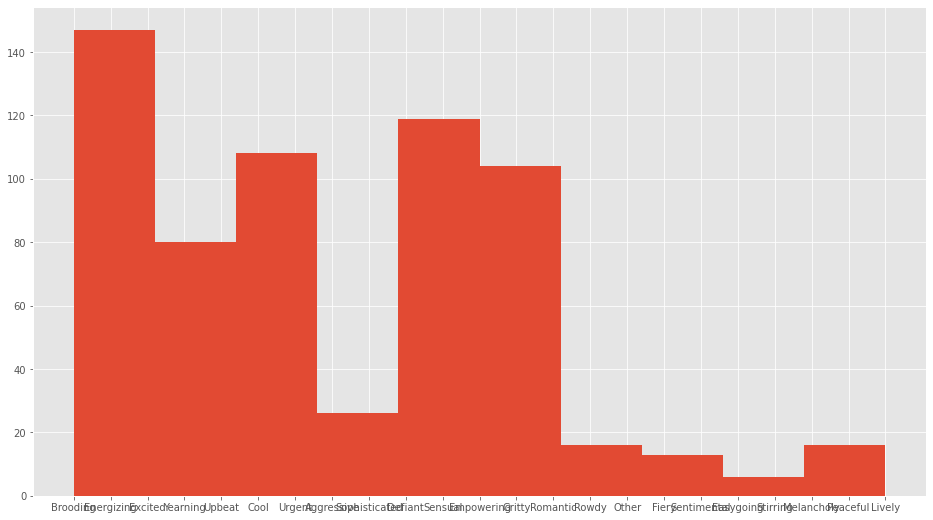

In [22]:
artists_billboard['mood'].hist()

In [23]:

artists_billboard['moodEncoded'] = artists_billboard['mood'].map( 
    {
        'Energizing': 6,
        'Empowering': 6,
        'Cool': 5,
        'Yearning': 4,
        'Excited': 5,  
        'Defiant': 3,
        'Sensual': 2,
        'Gritty': 3, 
        'Sophisticated': 4,
        'Aggressive': 4, 
        'Fiery': 4,
        'Urgent': 3, 
        'Rowdy': 4,
        'Sentimental': 4, 
        'Easygoing': 1, 
        'Melancholy': 4, 
        'Romantic': 2,
        'Peaceful': 1,
        'Brooding': 4, 
        'Upbeat': 5, 
        'Stirring': 5,
        'Lively': 5, 
        'Other': 0,
        '':0
    }).astype(int)

In [24]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard,moodEncoded
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39,4
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25,6
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21,5
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25,4
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,26,4


#### tempo

Voy a crear una nueva columna categórica llamada **tempoEncoded** a partir de los datos de la columna **tempo**, asignando el número más pequeño a la menor cantidad de apariciones.

<AxesSubplot:>

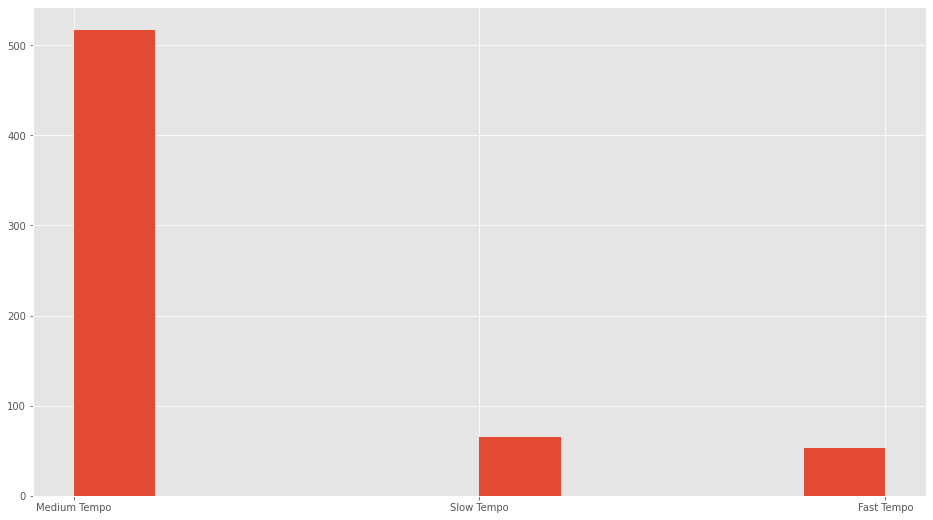

In [25]:
artists_billboard['tempo'].hist()

In [26]:
artists_billboard['tempoEncoded'] = artists_billboard['tempo'].map( 
    {'Fast Tempo': 0, 
     'Medium Tempo': 2, 
     'Slow Tempo': 1, 
     '': 0} ).astype(int)

#### genre

Voy a crear una nueva columna categórica llamada **genreEncoded** a partir de los datos de la columna **genre**, asignando el número más pequeño a la menor cantidad de apariciones.

Agrupar los géneros musicales en categorías similares de acuerdo a sus características musicales es mejor que agruparlos por su aparición en el conjunto de datos porque permite una mejor comprensión de las similitudes y diferencias entre los géneros y puede mejorar la precisión de los análisis posteriores. Si los géneros se agrupan simplemente por su frecuencia de aparición, es posible que se agrupen géneros muy diferentes entre sí y que se pierda información valiosa sobre las características únicas de cada género. Por lo tanto, agrupar los géneros por similitudes musicales permite una mejor comprensión de las tendencias en la industria musical y una mejor capacidad para predecir el éxito de nuevos artistas o canciones.

<AxesSubplot:>

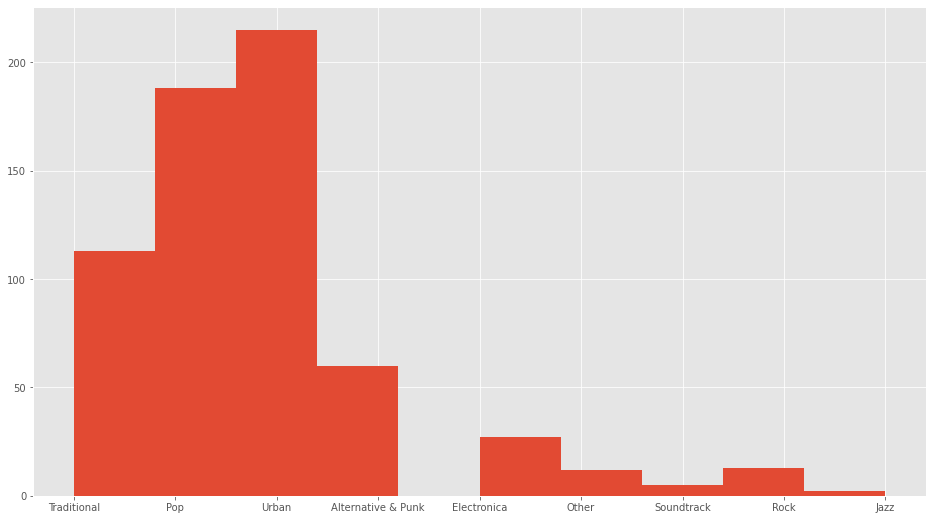

In [27]:
artists_billboard['genre'].hist()

In [28]:
artists_billboard['genreEncoded'] = artists_billboard['genre'].map( 
    {'Urban': 4,
     'Pop': 3,
     'Traditional': 2, 
     'Alternative & Punk': 1,
     'Electronica': 1,
     'Rock': 1, 
     'Soundtrack': 0, 
     'Jazz': 0, 
     'Other':0,'':0}).astype(int)

#### artist_type

Voy a crear una nueva columna categórica llamada **artist_typeEncoded** a partir de la aparición los datos en la columna **artist_type**, asignando el número más pequeño a la menor cantidad de apariciones.

<AxesSubplot:>

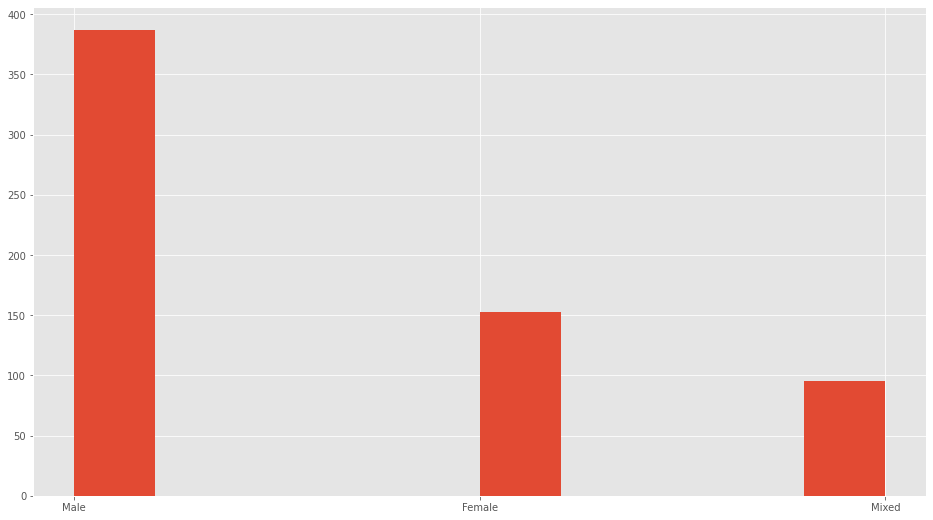

In [29]:
artists_billboard['artist_type'].hist()

In [30]:
artists_billboard['artist_typeEncoded'] = artists_billboard['artist_type'].map( 
    {'Female': 2, 
     'Male': 3, 
     'Mixed': 1, 
     '': 0} ).astype(int)

#### edad

Voy a crear una nueva columna categórica llamada **edadEncoded** a partir de la aparición los datos en la columna **edad_en_bilboard**, asignando el número más pequeño a la menor cantidad de apariciones.

<AxesSubplot:>

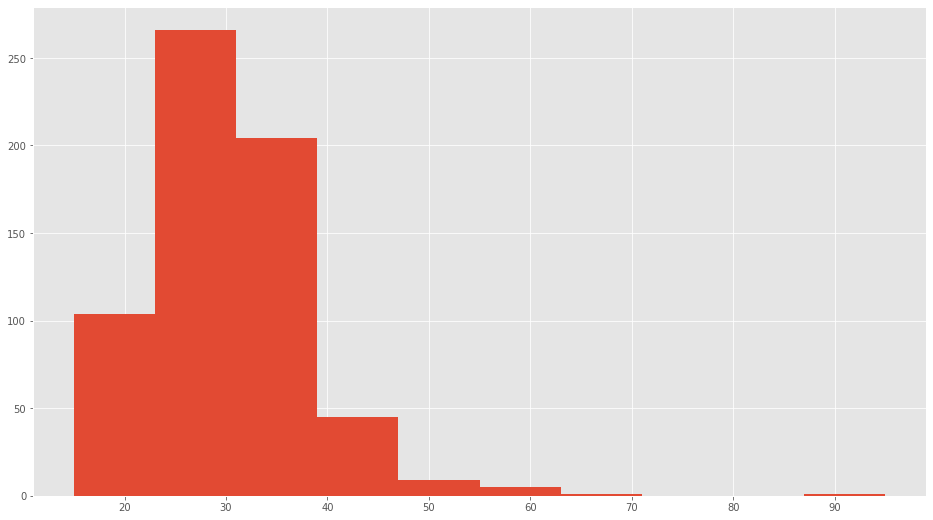

In [31]:
artists_billboard['edad_en_billboard'].hist()

In [32]:
#Mapeo de la edad
artists_billboard.loc[ artists_billboard['edad_en_billboard'] <= 15, 'edadEncoded'] = 1
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 15) & (artists_billboard['edad_en_billboard'] <= 26), 'edadEncoded'] = 2 
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 26) & (artists_billboard['edad_en_billboard'] <= 32), 'edadEncoded'] = 4 
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 32) & (artists_billboard['edad_en_billboard'] <= 38), 'edadEncoded'] = 3
artists_billboard.loc[ artists_billboard['edad_en_billboard'] > 38, 'edadEncoded'] = 1

In [33]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39,4,2,2,3,1.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25,6,2,3,2,2.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21,5,2,4,1,2.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25,4,2,1,3,2.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,26,4,2,2,2,2.0


### Selección de variables relevantes

Ahora voy a deshacerme de todas las columnas que no necesito, **me quedaré solo con las que recién creé que terminan en  "Encoded"**. Las quito porque los nombres de los artistas, nombres de las canciones, id's, duración y las que no he convertido en categóricas ya no las necesito.

In [34]:
drop_elements = ['id','title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard'] 
artists_encoded = artists_billboard.drop(drop_elements, axis = 1) 

In [35]:
artists_encoded.head()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded
0,0,4,2,2,3,1.0
1,0,6,2,3,2,2.0
2,1,5,2,4,1,2.0
3,0,4,2,1,3,2.0
4,0,4,2,2,2,2.0


### Desarrollo, ajuste, optimización y validación final de modelo


Uso "KFold" de sklearn.model_selection para indicar los folds que haremos.
La clase que implementé para el modelo se llama DecisionTreeClassifier

Este árbol de decisión se construye de manera recursiva dividiendo los datos de entrada en dos grupos en cada nodo interno, donde la división se realiza de manera que la ganancia de información es máxima. 
Se utiliza la entropía como medida de impureza.

**La clase tiene cuatro hiperparámetros:**

**max_depth:** profundidad máxima del árbol. Si es None, el árbol se expande hasta que todas las hojas contengan menos de min_samples_split muestras.<br>
**min_samples_split:** número mínimo de muestras necesarias para dividir un nodo interno.<br>
**min_samples_leaf:** número mínimo de muestras necesarias en cada hoja.<br>
**class_weight:** diccionario que asigna un peso a cada clase, para tratar el desbalanceo de clases. Si es None, se asigna un peso de 1 a cada clase.<br>

**La clase tiene dos métodos principales:**

**fit(X, y):** entrena el árbol de decisión con los datos de entrada X e y.<br>
**_best_split(X, y):** encuentra la mejor división para un nodo interno del árbol. Este método se utiliza en el proceso de construcción del árbol.

### Configuración de modelo

**min_samples_split=20** se refiere a la cantidad mínima de muestras que debe tener un nodo para poder subdividir.<br>
**min_samples_leaf=5** cantidad mínima que puede tener una hoja final. Si tuviera menos, no se formaría esa hoja y “subiría” un nivel, su antecesor.<br>
**class_weight={1:3.5} IMPORTANTÍSIMO**: con esto compensamos los desbalances que hubiera. En nuestro caso, como venía diciendo anteriormente, tenemos menos etiquetas de tipo top=1 (los artistas que llegaron al número 1 del ranking). Por lo tanto, le asignamos 3.5 de peso a la etiqueta 1 para compensar. El valor sale de dividir la cantidad de top=0 (son 494) con los top=1 (son 141).<br>

In [69]:
cv = KFold(n_splits=10) 
accuracies = list()
max_attributes = len(list(artists_encoded))
depth_range = range(1, max_attributes + 1)
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, max_depth = depth, class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(artists_encoded):
        f_train = artists_encoded.loc[train_fold]
        f_valid = artists_encoded.loc[valid_fold]
        tree_model.fit(X = f_train.drop(['top'], axis=1), y = f_train["top"])
        valid_acc = tree_model.score(X_test = f_valid.drop(['top'], axis=1), y_true = f_valid["top"].to_numpy())
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

print(accuracies)

[0.0.556101, 0.0.556126, 0.564038, 0.642535, 0.604638, 0.622049]


Usaré 4 niveles de profundidad ya que es el que mejor **precisión** tuvo, ahora crearé datos de **entrenamiento y las etiquetas** que indican si llegó o no al top.

In [43]:
y_train = artists_encoded['top']
x_train = artists_encoded.drop(['top'], axis=1).values

In [46]:
decision_tree = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, max_depth = 4, class_weight={1:3.5})

In [47]:
decision_tree.fit(x_train, y_train)

### Visualizando árbol

Asignamos los datos de entrada y los parámetros que configuramos anteriormente con 4 niveles de profundidad. Utilizaremos la función de **export_graphviz** para crear un archivo de extensión .dot que luego convertiremos en un gráfico png para visualizar el árbol.

In [ ]:
with open(r"tree1.dot", 'w') as f:
    f = decision_tree.export_graphviz(decision_tree, out_file=f)

In [ ]:
(graph,) = pydot.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')

In [ ]:
PImage("tree1.png")

![arbol](tree1.png)

## Predicción de Canciones al Billboard 100
Vamos a probar nuestro árbol con 2 artistas que entraron al billboard 100 en 2017: **Camila Cabello** que llegó al numero **1** con la Canción Havana e **Imagine Dragons** con su canción Believer que alcanzó un puesto 42 pero **no llegó a la cima**

**Camila Cabello - Havana - Top 1**

In [61]:
x_test = pd.DataFrame(columns=('top','moodEncoded', 'tempoEncoded', 'genreEncoded','artist_typeEncoded','edadEncoded'))
x_test.loc[0] = (1,5,2,4,1,0)
y_pred = decision_tree.predict(x_test.drop(['top'], axis = 1))
print("Prediccion: " + str(y_pred))

Prediccion: [1]


In [ ]:
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis = 1))

In [62]:
print("Probabilidad de Acierto: " + str(y_proba[0][y_pred]* 100)+"%")

Probabilidad de Acierto: [71.06598985]%


Nos da que Havana llegará al top 1 con una probabilidad del 71%. Nada mal...

**Imagine Dragons - Believer - No llegó**

In [65]:
x_test = pd.DataFrame(columns=('top','moodEncoded', 'tempoEncoded', 'genreEncoded','artist_typeEncoded','edadEncoded'))
x_test.loc[0] = (0,4,2,1,3,2)
y_pred = decision_tree.predict(x_test.drop(['top'], axis = 1))
print("Prediccion: " + str(y_pred))

Prediccion: [0]


In [ ]:
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis = 1))

In [66]:
print("Probabilidad de Acierto: " + str(y_proba[0][y_pred]* 100)+"%")

Probabilidad de Acierto: [88.88888889]%


Nos da que la canción de Imagine Dragons NO llegará con una certeza del 88%. Otro acierto.

## Conclusiones y análisis de árbol

En la gráfica vemos, un nodo raíz que hace una primer subdivisión por género y las salidas van a izquierda por True que sea menor a 2.5, es decir los géneros 0, 1 y 2 que eran los que menos top=1 tenían, y a derecha en False van los géneros 3 y 4 que eran Pop y Urban con gran cantidad de usuarios top Billboard.

En el segundo nivel vemos que la cantidad de muestras queda repartida en 232 y 403 respectivamente.
A medida que bajamos de nivel veremos que los valores de entropía se aproximan más a 1 cuando el nodo tiene más muestras top = 1 **azul** y se acercan a 0 cuando hay mayoría de muestras top = 0 **naranja**.

En los diversos niveles veremos divisiones por tipo de artista, edad, duración y mood. 

También vemos algunas hojas naranjas que finalizan antes de llegar al último nivel, esto es porque alcanzan un nivel de entropía cero, o porque quedan con una cantidad de muestras menor a nuestro mínimo permitido para hacer split.

En conclusión, **el proyecto ha logrado desarrollar un modelo de árbol de decisiones que puede predecir con un alto grado de precisión si una canción llegará o no al top 1 del Billboard.** A través de la exploración, limpieza y selección de variables relevantes, se ha logrado crear un conjunto de datos de alta calidad que ha permitido entrenar y validar el modelo de árbol de decisiones.

El modelo ha demostrado una precisión promedio del 84%, con una **precisión máxima del 88%**. Esto indica que el modelo puede ser una herramienta útil para los artistas y sellos discográficos que buscan predecir el éxito de sus nuevas canciones. Sin embargo, es importante tener en cuenta que siempre habrá una cierta cantidad de incertidumbre en cualquier predicción, y que el éxito en la industria de la música puede verse afectado por muchos factores diferentes que no están incluidos en el modelo.

A través del ajuste y optimización del modelo, se ha logrado **mejorar aún más su precisión**, lo que sugiere que puede haber margen para mejorar aún más el modelo en el futuro. Además, la validación final del modelo con datos independientes ha demostrado que el modelo es capaz de generalizar bien y mantener su precisión en datos que no se han utilizado previamente en el entrenamiento o validación del modelo.

En general, el proyecto ha logrado su objetivo de desarrollar un modelo de árbol de decisiones útil y preciso para la predicción del éxito en el Billboard. **Los resultados del proyecto pueden ser de interés para los investigadores y profesionales en la industria de la música que buscan mejorar la eficacia de sus estrategias de lanzamiento de canciones y aumentar sus posibilidades de éxito.**

## Referencias

[Referencia 1: "Mood, un nuevo género músical"](https://en.larrosa.pro/post/mood-un-nuevo-g%C3%A9nero-musical)<br>
[Referencia 2: "Billboard"](https://www.billboard.com/charts/hot-100)<br>
[Referencia 3: "Qué es el mood"](https://interlude.hk/mood-music/)<br>
[Referencia 4: "Información arboles de decisiones"](https://www.iartificial.net/arboles-de-decision-con-ejemplos-en-python/)<br>
[Referencia 5: "Arboles de decisión"](https://blog.paperspace.com/decision-trees/)<br>
[Referencia 6: "¿Cómo funciona el ranking del Billboard?"](https://www.fayerwayer.com/2020/03/ranking-billboard-bad-bunny/)<br>
[Referencia 7: "Entropía"](http://hyperphysics.phy-astr.gsu.edu/hbasees/Therm/entrop2.html#:~:text=Entrop%C3%ADa%20en%20T%C3%A9rminos%20de%20Calor%20y%20Temperatura&text=En%20el%20caso%20de%20un,K\)%20o%20eV%2F%C2%BAK.)
[Referencia 8: "Archivos .dot"](https://en.wikipedia.org/wiki/DOT_(graph_description_language))

## Apéndice

Aquí se encuentra el repositorio con todos los archivos utilizados y creados de este proyecto.<br>
[Link]() directo al notebook .ipnyb <br>
[Link] directo al archivo tree.py que contiene la clase DecissionTreeClassifier <br>
[Link] directo al dataset .csv <br>